In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
# === Load Data ===
df = pd.read_csv(r'D:\Coding\Major-Project\new_\data\PEMfuel cell.csv')

df.head()

,I,V,P,Q,T,Hydrogen,Oxygen,RH anode,Rh Cathode
0,0.0,491.114619,0.0,8.580000e-35,20.0,8.410000e-38,0.000000e+00,0.000000e+00,0.5
1,0.0,491.114619,0.0,-3.880000e-12,20.0,4.970000e-07,4.110000e-09,2.680000e-14,0.5
2,0.0,491.114619,0.0,-7.750000e-12,20.0,1.140000e-06,1.130000e-08,8.050000e-14,0.5
3,0.0,491.114619,0.0,-3.050000e-11,20.0,5.330000e-06,8.890000e-08,1.350000e-12,0.5
4,0.0,491.114619,0.0,-6.400000e-11,20.0,1.160000e-05,2.240000e-07,5.360000e-12,0.5


In [5]:
X = df[['I', 'T', 'Hydrogen', 'Oxygen']]  # I = current, T = temperature
y = df['V']  # Voltage

In [6]:
# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# === SVR Pipeline with StandardScaler ===
model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
)

In [8]:
# === Train the Model ===
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=100))])

In [9]:
# === Predict and Evaluate ===
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error(MAE): {mae:.4f}")
print(f"Mean Squared Error(MSE): {mse:.4f}")

R² Score: 0.9897
Mean Absolute Error(MAE): 3.6356
Mean Squared Error(MSE): 56.6441


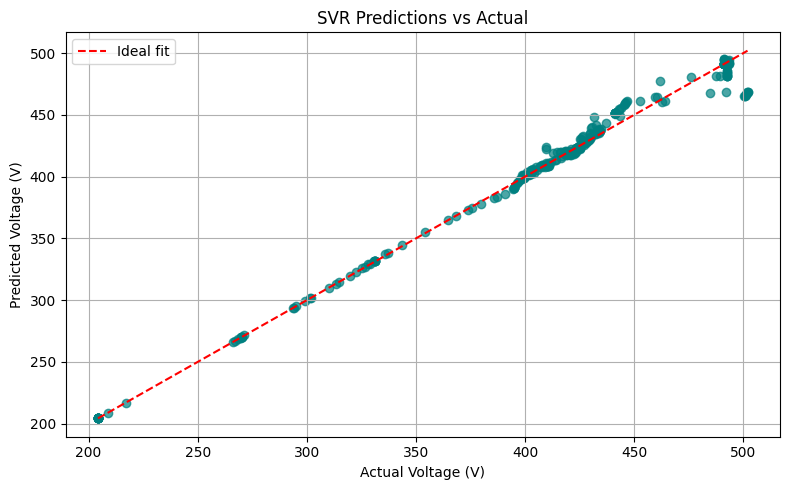

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.xlabel("Actual Voltage (V)")
plt.ylabel("Predicted Voltage (V)")
plt.title("SVR Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'svr__C': [1, 10, 100],
#     'svr__epsilon': [0.01, 0.1, 0.2],
#     'svr__gamma': ['scale', 0.01, 0.1]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# y_pred = grid_search.predict(X_test)


Best Parameters: {'svr__C': 100, 'svr__epsilon': 0.01, 'svr__gamma': 'scale'}


In [12]:
import joblib

# Save the model to a file
joblib.dump(model, 'svr_model.pkl')
print("Model saved as svr_model.pkl")


Model saved as svr_model.pkl
